  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

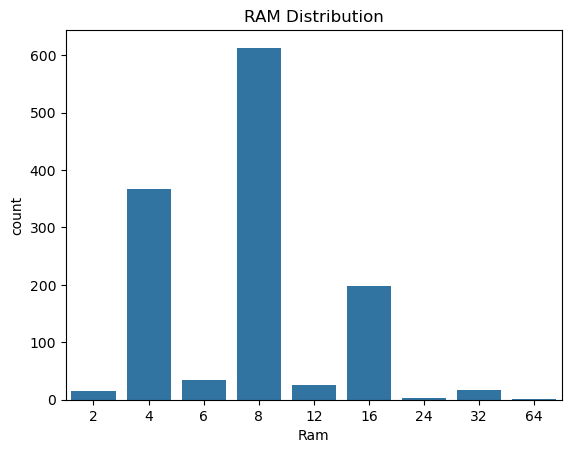

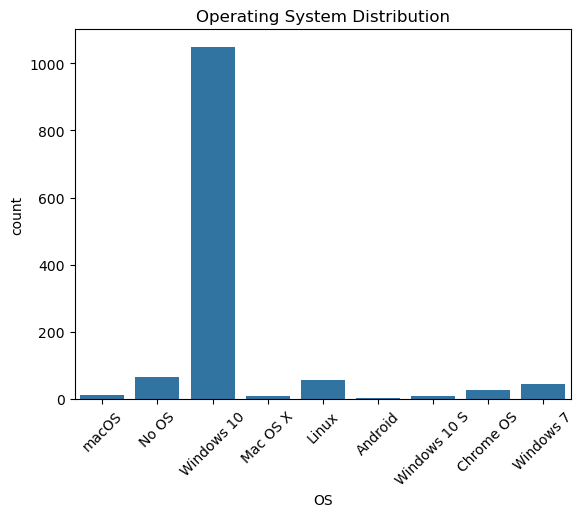

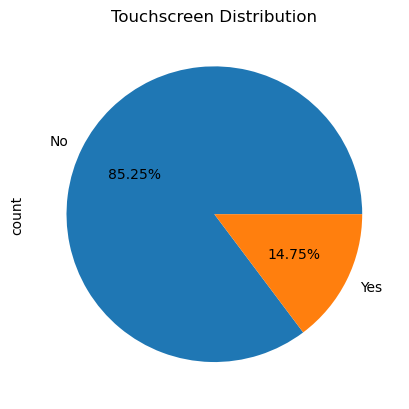

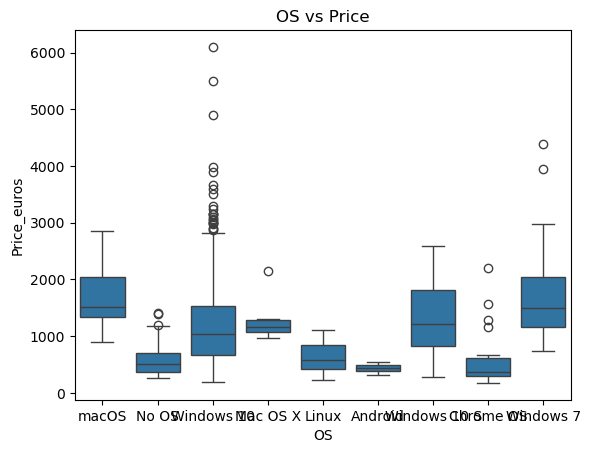

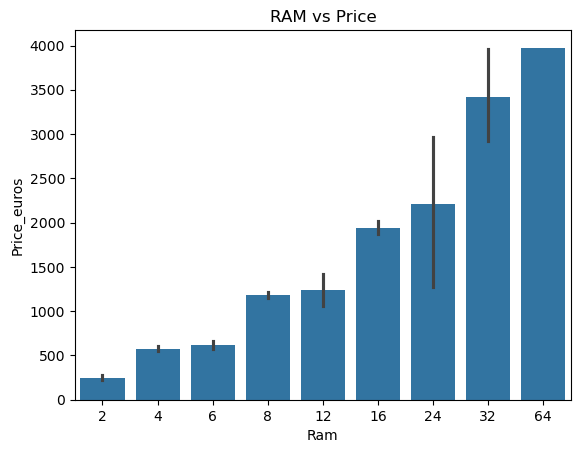

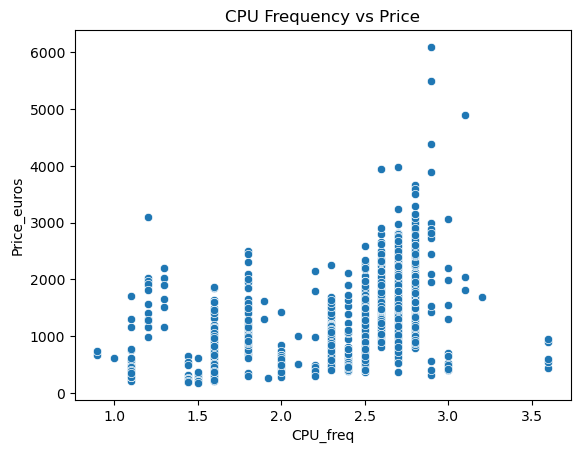

Linear Regression R²: -14.352757836548518
Random Forest R²: 0.8659863175301121


In [1]:
# ============================
# STEP 1: Import Libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# ============================
# STEP 2: Load Dataset
# ============================
df = pd.read_csv("laptop_prices.csv", encoding="ISO-8859-1")
print(df.head())


# ============================
# EDA (Exploratory Data Analysis)
# ============================

# --- Univariate ---
sns.countplot(x=df["Ram"])
plt.title("RAM Distribution")
plt.show()

sns.countplot(x=df["OS"])
plt.title("Operating System Distribution")
plt.xticks(rotation=45)
plt.show()

df["Touchscreen"].value_counts().plot(kind="pie", autopct="%.2f%%")
plt.title("Touchscreen Distribution")
plt.show()


# --- Bivariate ---
sns.boxplot(x=df["OS"], y=df["Price_euros"])
plt.title("OS vs Price")
plt.show()

sns.barplot(x=df["Ram"], y=df["Price_euros"])
plt.title("RAM vs Price")
plt.show()

sns.scatterplot(x=df["CPU_freq"], y=df["Price_euros"])
plt.title("CPU Frequency vs Price")
plt.show()


# ============================
# FEATURE ENGINEERING
# ============================
df["TotalStorage"] = df["PrimaryStorage"] + df["SecondaryStorage"]
df["PixelDensity"] = df["ScreenW"] * df["ScreenH"]

df["WeightClass"] = pd.cut(
    df["Weight"],
    bins=[0, 1.5, 2.5, 5],
    labels=["Light", "Medium", "Heavy"]
)

# Convert categorical columns into numbers
df = pd.get_dummies(df, drop_first=True)


# ============================
# MODELING
# ============================
X = df.drop("Price_euros", axis=1)
y = df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Linear Regression ---
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)
lin_r2 = r2_score(y_test, lin_pred)

# --- Random Forest ---
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)

print("Linear Regression R²:", lin_r2)
print("Random Forest R²:", rf_r2)
